<a href="https://colab.research.google.com/github/Saria-Alashry/Alashry/blob/%D8%A7%D9%84%D9%83%D9%88%D8%B1%D8%B3-%D8%A7%D9%84%D9%85%D9%81%D8%B5%D9%84-%D9%81%D9%8A-%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D9%88%D9%85%D8%B3%D8%A7%D8%A8%D9%82%D8%A9-%D8%A8%D8%B1%D9%85%D8%AC%D8%A9-50-%D8%A7%D9%84%D9%81-%D8%AC%D9%86%D9%8A%D9%87/Week5_Part2_Visualization_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Part 2: Data Visualization & Multicollinearity

**Instructor:** Dr. Mahmoud Eid (m.eid@fci-cu.edu.eg)
**Time:** ~1.5 hours

<div dir="rtl">
<b>النهاردة هنتعلم ازاي نستكشف الـ data ونكتشف المشاكل قبل الـ training بإذن الله!</b>
</div>

## Topics

1. Data Visualization Fundamentals
2. Correlation Analysis
3. Multicollinearity Detection (VIF)
4. One method for handling Multicollinearity

**Real Dataset:** California Housing (20,640 houses)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')
np.random.seed(42)
print("✅ Ready!")

✅ Ready!


---

# 1. Data Visualization Fundamentals

**Why Visualize?**

- Understand data distribution
- Detect outliers
- Identify relationships between features
- Make informed preprocessing decisions


In [2]:
# Load California Housing dataset
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Price'] = housing.target

print(f"Dataset: California Housing")
print(f"Samples: {len(df_housing)}")
print(f"Features: {housing.feature_names}")
print(f"\nPreview:")
print(df_housing.head())

Dataset: California Housing
Samples: 20640
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
# Statistical summary
print("Statistical Summary:")
print(df_housing.describe())

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

### Distribution Analysis


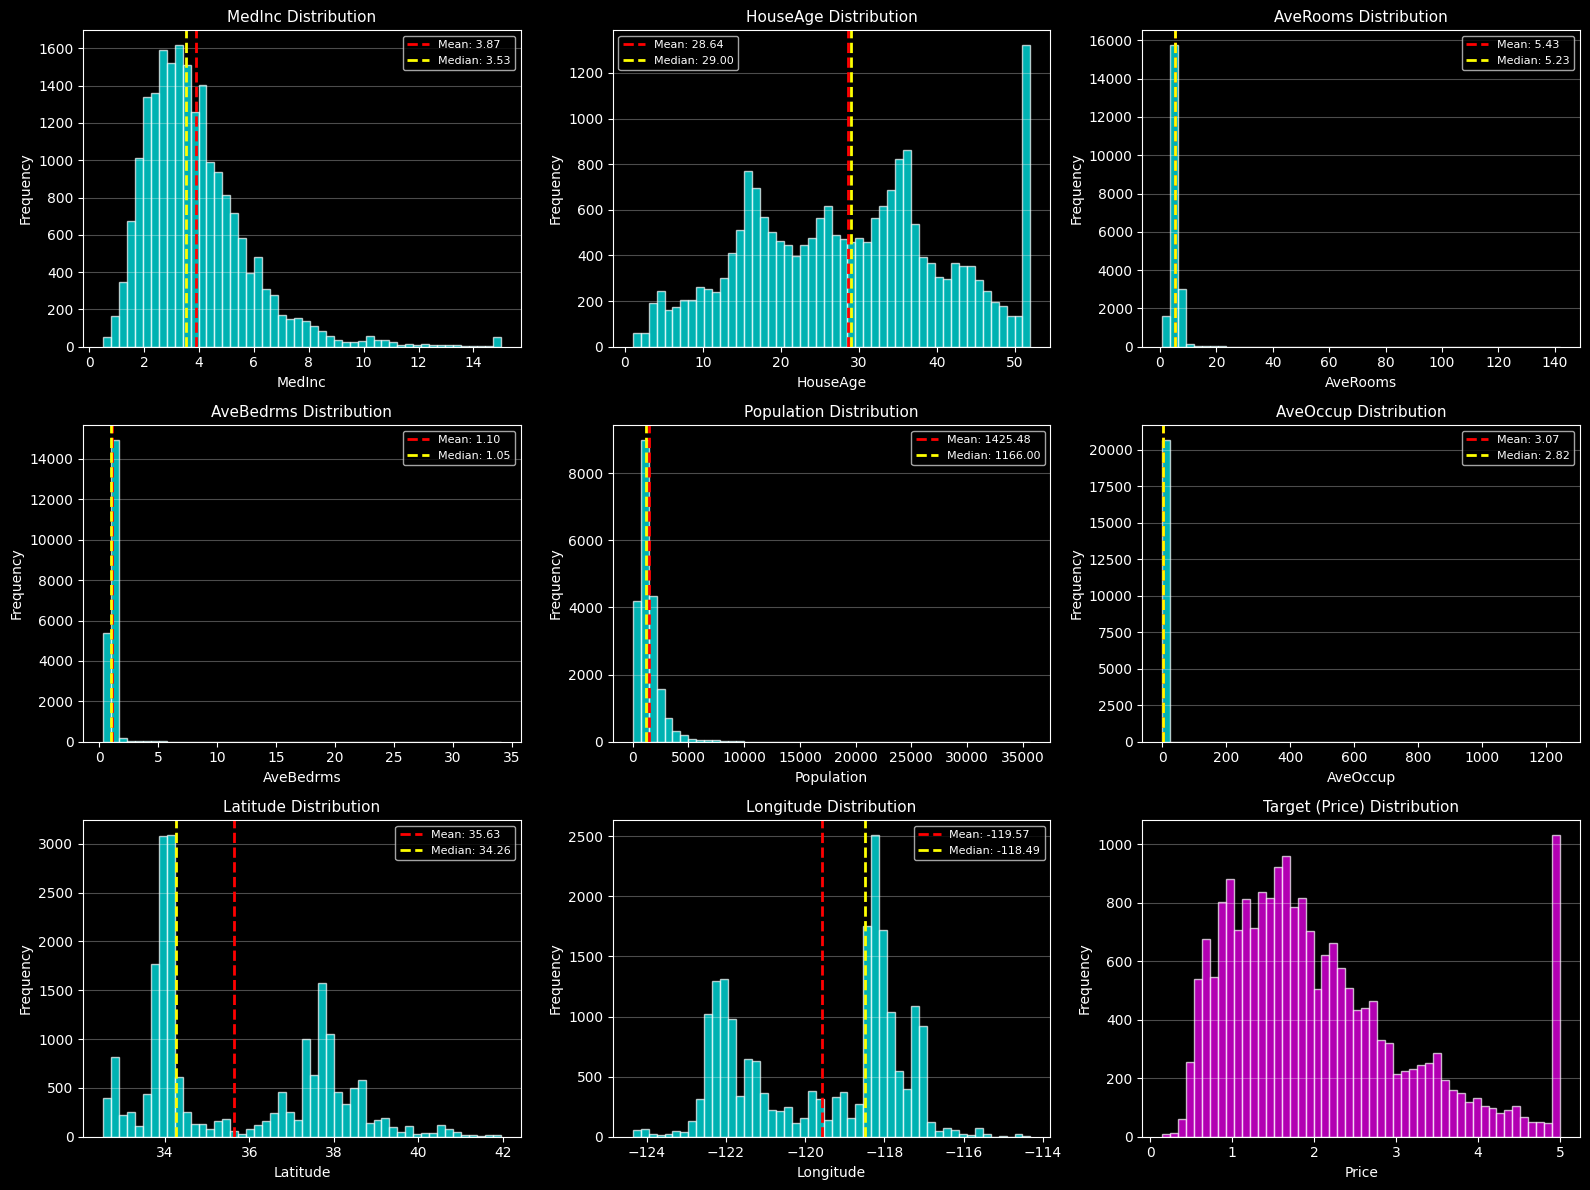

In [4]:
# Feature distributions
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(housing.feature_names):
    axes[i].hist(df_housing[col], bins=50, alpha=0.7, color='cyan', edgecolor='white')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'{col} Distribution', fontsize=11)
    axes[i].grid(alpha=0.3, axis='y')

    # Add mean and median lines
    mean_val = df_housing[col].mean()
    median_val = df_housing[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='yellow', linestyle='--', linewidth=2,
                    label=f'Median: {median_val:.2f}')
    axes[i].legend(fontsize=8)

# Target distribution
axes[8].hist(df_housing['Price'], bins=50, alpha=0.7, color='magenta', edgecolor='white')
axes[8].set_xlabel('Price', fontsize=10)
axes[8].set_ylabel('Frequency', fontsize=10)
axes[8].set_title('Target (Price) Distribution', fontsize=11)
axes[8].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Box Plots for Outlier Detection

Box plots show:

- **Box:** 25th to 75th percentile (IQR)
- **Line:** Median
- **Whiskers:** 1.5 × IQR
- **Points:** Outliers


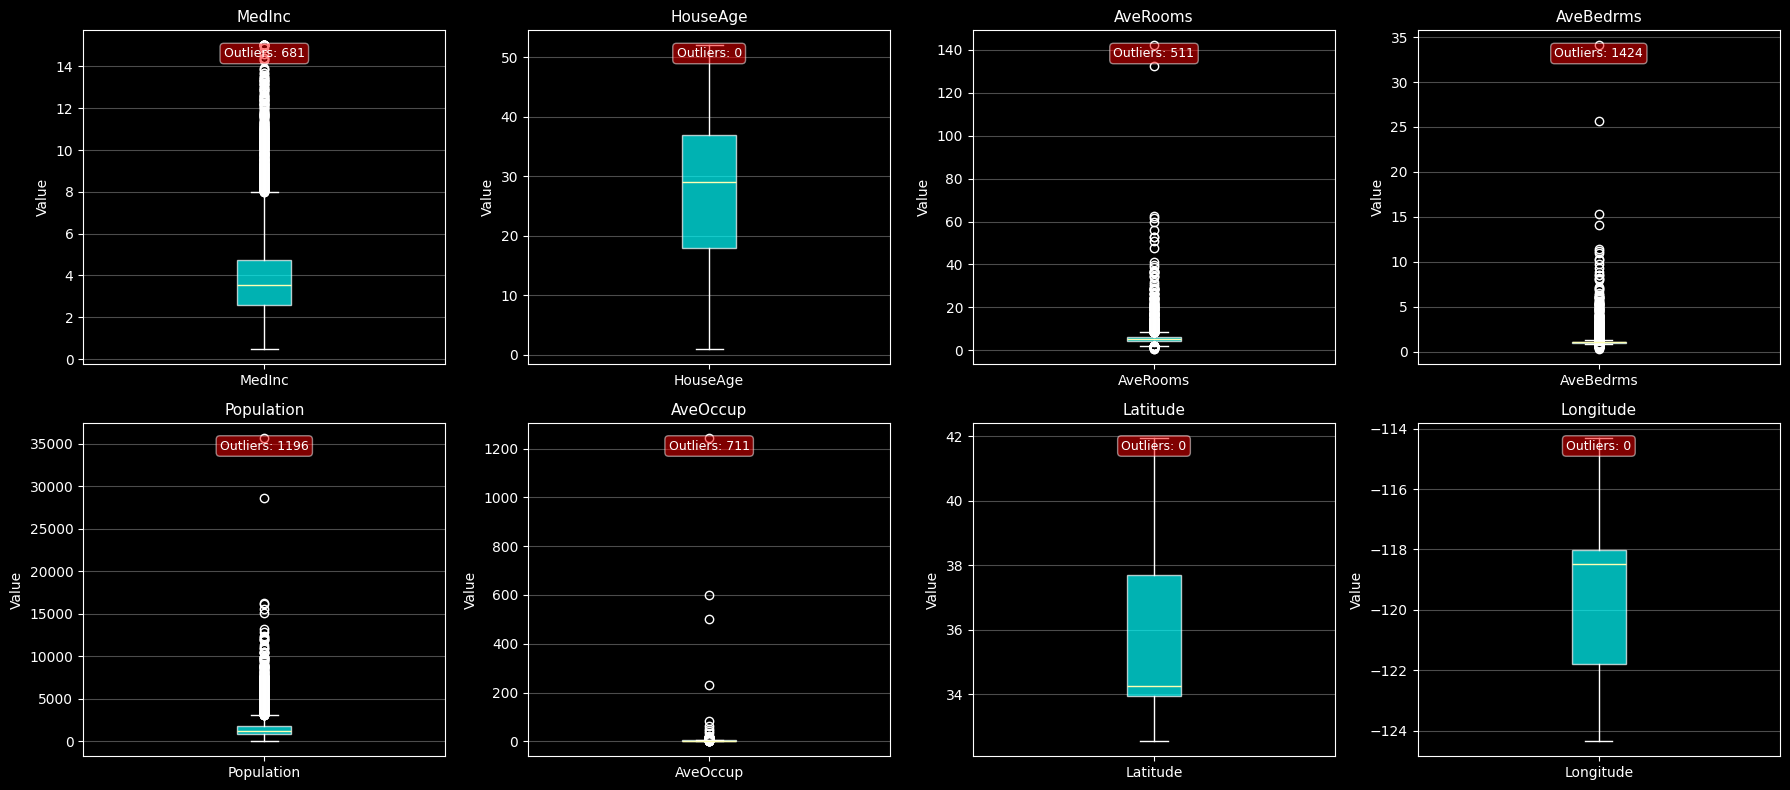

In [5]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(housing.feature_names):
    bp = axes[i].boxplot([df_housing[col]], tick_labels=[col], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('cyan')
        patch.set_alpha(0.7)
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].grid(alpha=0.3, axis='y')

    # Count outliers
    Q1 = df_housing[col].quantile(0.25)
    Q3 = df_housing[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_housing[col] < Q1 - 1.5*IQR) | (df_housing[col] > Q3 + 1.5*IQR)).sum()
    axes[i].text(0.5, 0.95, f'Outliers: {outliers}',
                 transform=axes[i].transAxes, ha='center', va='top',
                 bbox=dict(boxstyle='round', facecolor='red', alpha=0.5), fontsize=9)

plt.tight_layout()
plt.show()

### Scatter Plot Matrix (Pair Plot)

Shows relationships between all feature pairs.


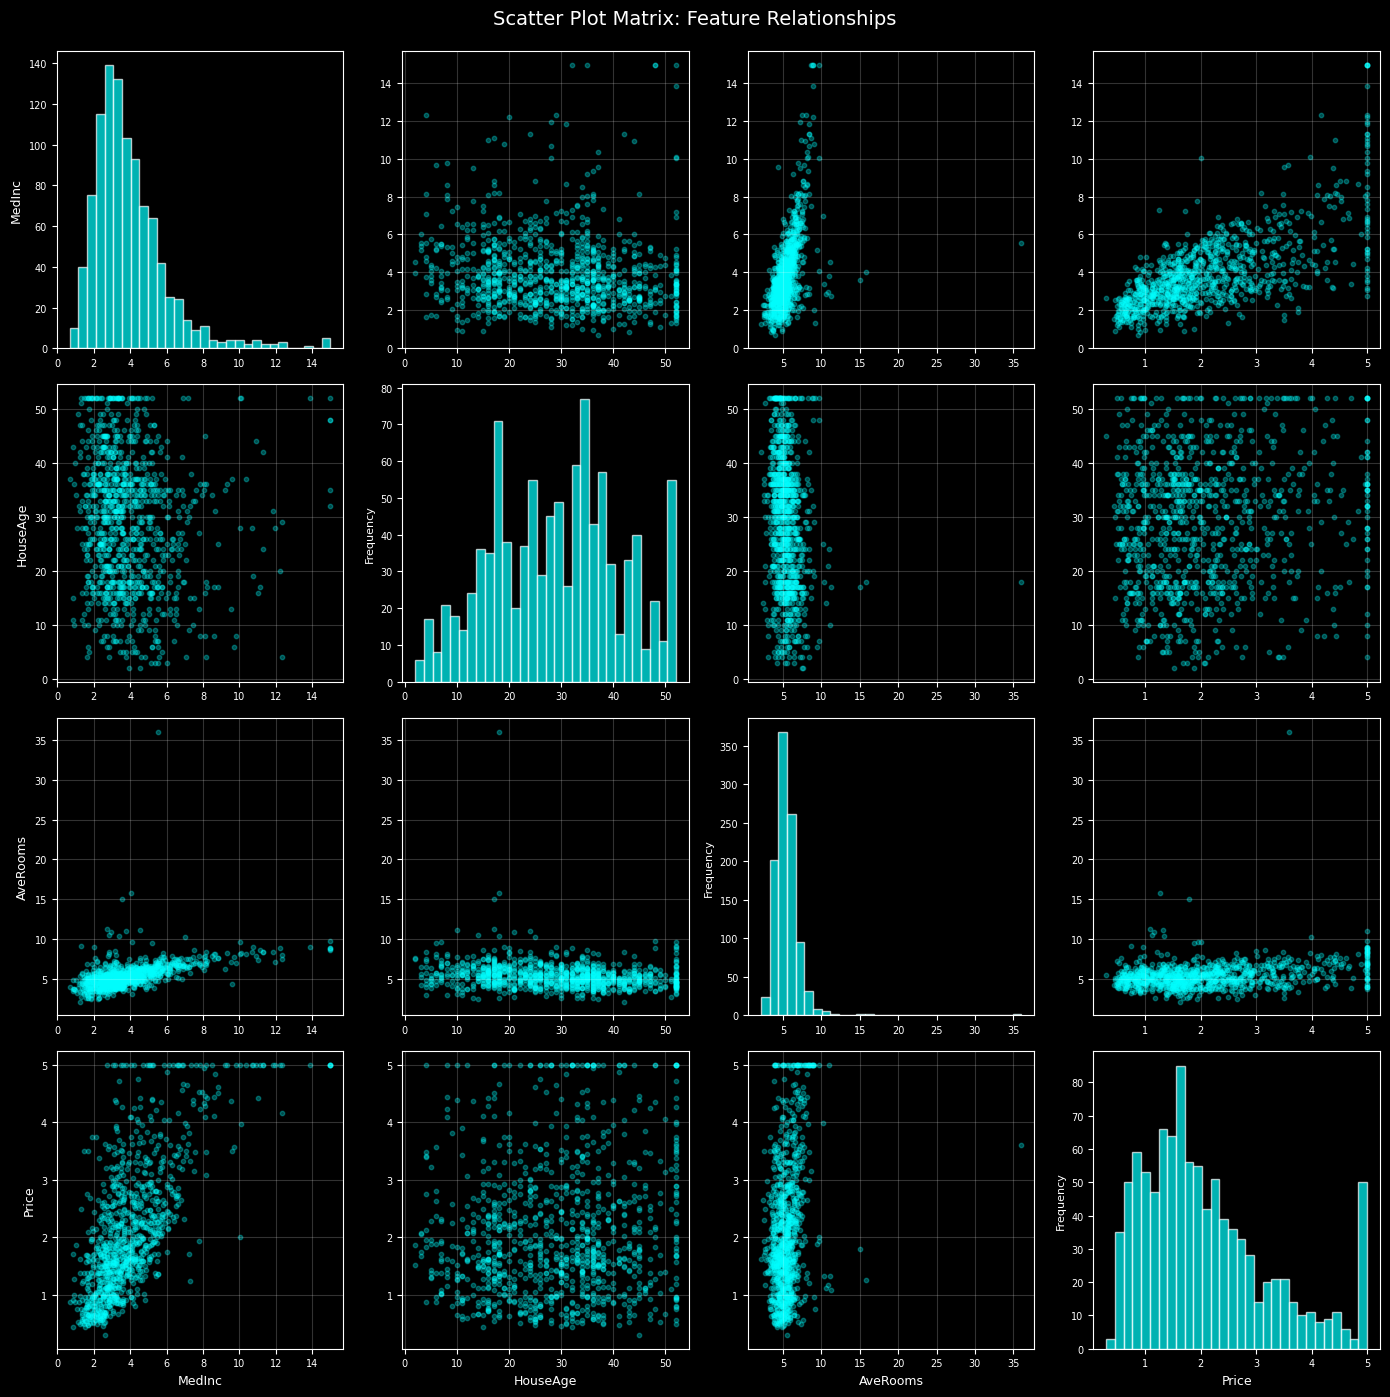

In [6]:
# Scatter plot matrix (subset of features for clarity)
features_subset = ['MedInc', 'HouseAge', 'AveRooms', 'Price']
df_subset = df_housing[features_subset].sample(1000, random_state=42)

fig = plt.figure(figsize=(14, 14))
n_features = len(features_subset)

for i in range(n_features):
    for j in range(n_features):
        ax = plt.subplot(n_features, n_features, i * n_features + j + 1)

        if i == j:
            # Diagonal: notice that correlation would be highest because this is the feature with itself so instead we put histograms here
            # see how this figure captures many things at once
            ax.hist(df_subset.iloc[:, i], bins=30, color='cyan', alpha=0.7, edgecolor='white')
            ax.set_ylabel('Frequency', fontsize=8)
        else:
            # Off-diagonal: scatter plots
            ax.scatter(df_subset.iloc[:, j], df_subset.iloc[:, i],
                       alpha=0.3, s=10, color='cyan')
            ax.grid(alpha=0.2)

        # Labels
        if i == n_features - 1:
            ax.set_xlabel(features_subset[j], fontsize=9)
        if j == 0:
            ax.set_ylabel(features_subset[i], fontsize=9)

        ax.tick_params(labelsize=7)

plt.suptitle('Scatter Plot Matrix: Feature Relationships', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

### Exercise 1: Create Box Plots

**Task:** Create box plots for the Diabetes dataset to identify outliers.


In [7]:
# Load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data[:, :5],
                           columns=['Age', 'Sex', 'BMI', 'BP', 'S1'])

print(f"Diabetes dataset: {df_diabetes.shape}")
print(df_diabetes.head())

Diabetes dataset: (442, 5)
        Age       Sex       BMI        BP        S1
0  0.038076  0.050680  0.061696  0.021872 -0.044223
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449
2  0.085299  0.050680  0.044451 -0.005670 -0.045599
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191
4  0.005383 -0.044642 -0.036385  0.021872  0.003935


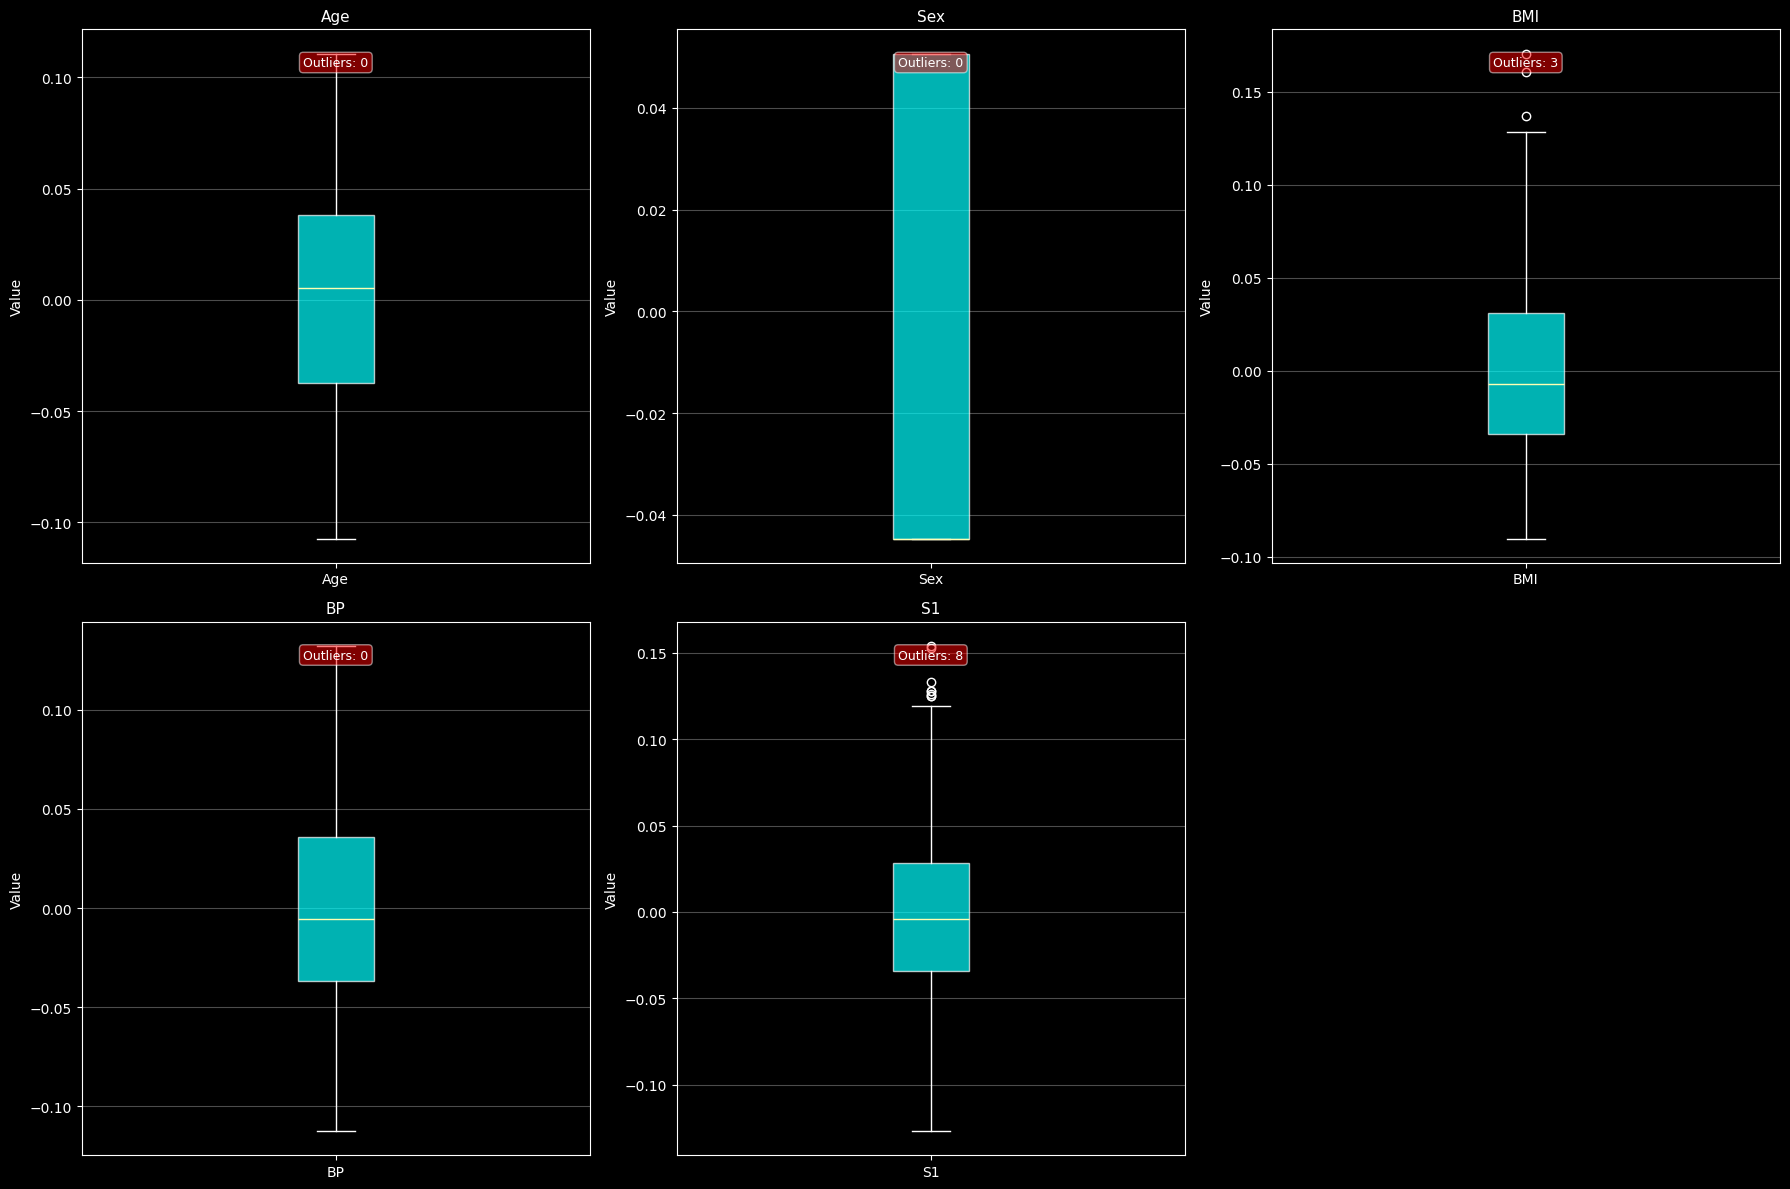

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(df_diabetes.columns):
    if i < len(df_diabetes.columns): # Ensure we don't try to plot beyond the number of actual columns
        bp = axes[i].boxplot([df_diabetes[col]], tick_labels=[col], patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('cyan')
            patch.set_alpha(0.7)
        axes[i].set_ylabel('Value', fontsize=10)
        axes[i].set_title(f'{col}', fontsize=11)
        axes[i].grid(alpha=0.3, axis='y')

        # Count outliers
        Q1 = df_diabetes[col].quantile(0.25)
        Q3 = df_diabetes[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_diabetes[col] < Q1 - 1.5*IQR) | (df_diabetes[col] > Q3 + 1.5*IQR)).sum()
        axes[i].text(0.5, 0.95, f'Outliers: {outliers}',
                     transform=axes[i].transAxes, ha='center', va='top',
                     bbox=dict(boxstyle='round', facecolor='red', alpha=0.5), fontsize=9)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
print("✅ Exercise 1 passed!")

✅ Exercise 1 passed!


---

# 2. Correlation Analysis

**Correlation coefficient (r):**

- **r = 1:** Perfect positive correlation
- **r = 0:** No correlation
- **r = -1:** Perfect negative correlation

$$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$


In [11]:
# Compute correlation matrix
corr_matrix = df_housing.corr()

print("Correlation with Target (Price):")
print(corr_matrix['Price'].sort_values(ascending=False))

Correlation with Target (Price):
Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


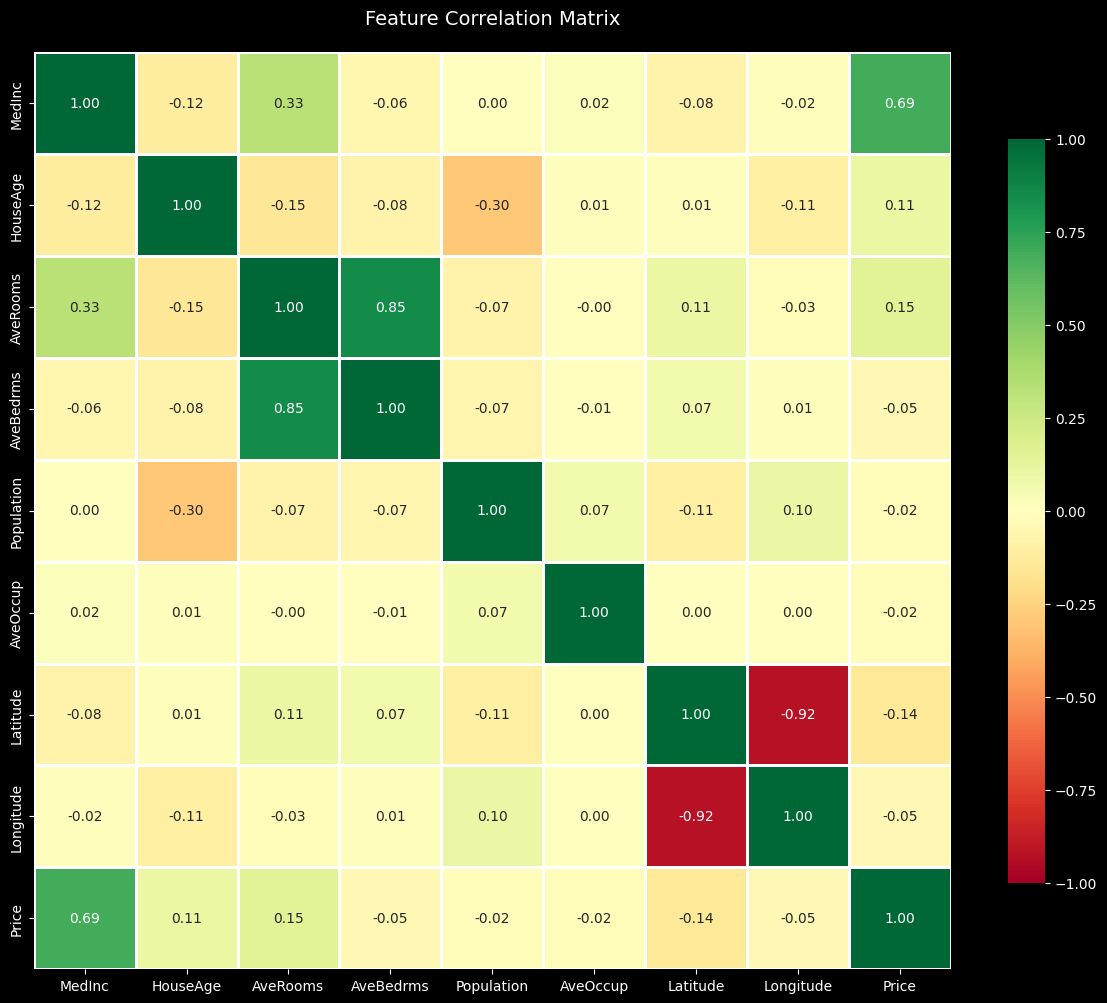

In [12]:
# Correlation heatmap .. note how the color reflects the value (use the colorbar on the right as the reference)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

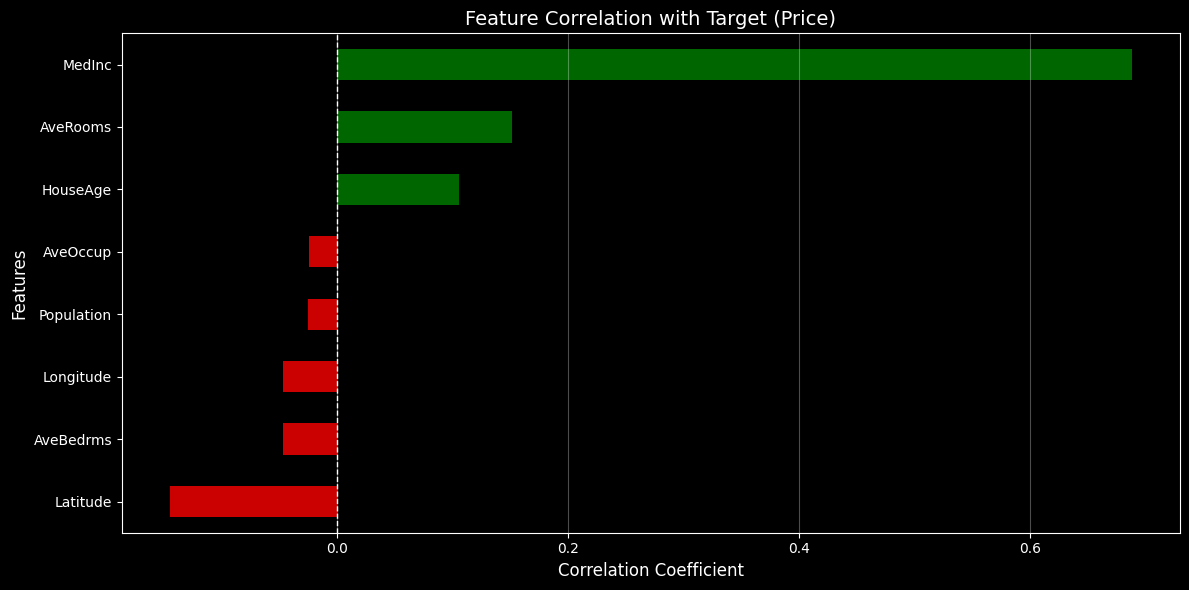

In [13]:
# Target correlation bar plot, see how we can use this plot to visualise correlation values
fig, ax = plt.subplots(figsize=(12, 6))
target_corr = corr_matrix['Price'].drop('Price').sort_values()
colors = ['red' if x < 0 else 'green' for x in target_corr]  # to change that to specific color based on direction of correlation
target_corr.plot(kind='barh', color=colors, ax=ax, alpha=0.8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Correlation with Target (Price)', fontsize=14)
ax.axvline(0, color='white', linestyle='--', linewidth=1)
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Exercise 2: Find Highly Correlated Features

**Task:** Identify all feature pairs with |correlation| > 0.7


In [17]:
# YOUR TASK: Find highly correlated pairs
# YOUR CODE HERE
high_corr_pairs = []

# Get the correlation matrix (already computed in previous cells as corr_matrix)
# corr_matrix = df_housing.corr()

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feature1 = corr_matrix.columns[i]
        feature2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]

        if abs(correlation) > 0.7:
            high_corr_pairs.append((feature1, feature2, correlation))

print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
for pair in high_corr_pairs:
    print(f"  - {pair[0]} & {pair[1]}: {pair[2]:.3f}")

print(f"\nFound {len(high_corr_pairs)} highly correlated pairs")

Highly Correlated Feature Pairs (|correlation| > 0.7):
  - AveRooms & AveBedrms: 0.848
  - Latitude & Longitude: -0.925

Found 2 highly correlated pairs


In [15]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    print(f"Outliers in '{column}' have been capped.")

# Handle outliers in 'BMI' and 'S1' columns
cap_outliers_iqr(df_diabetes, 'BMI')
cap_outliers_iqr(df_diabetes, 'S1')

print("First 5 rows of df_diabetes after outlier capping:")
display(df_diabetes.head())

Outliers in 'BMI' have been capped.
Outliers in 'S1' have been capped.
First 5 rows of df_diabetes after outlier capping:


,Age,Sex,BMI,BP,S1
0,0.038076,0.050680,0.061696,0.021872,-0.044223
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449
2,0.085299,0.050680,0.044451,-0.005670,-0.045599
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191
4,0.005383,-0.044642,-0.036385,0.021872,0.003935


In [16]:
print("✅ Exercise 2 passed!")

✅ Exercise 2 passed!


---

# 3. Multicollinearity Detection

**Multicollinearity:** When features are highly correlated with each other

**Problems it causes:**

1. Unstable coefficient estimates
2. High variance in predictions
3. Difficulty interpreting feature importance

**Detection Methods: we can visually inspect correlations to detect it and we can also use Variance Inflation Factor (VIF)**

$$VIF_i = \frac{1}{1 - R_i^2}$$

Where $R_i^2$ is the R² from regressing feature $i$ on all other features.

**Rule of thumb:**

- VIF < 5: Low multicollinearity
- VIF 5-10: Moderate multicollinearity
- VIF > 10: High multicollinearity (problematic!)

VIF won't be able to tell which feature correlated with which.


In [18]:
# Compute VIF for each feature
def compute_vif(X):
    """Compute VIF for each feature"""
    vif_data = []
    for i in range(X.shape[1]):
        # Use all other features to predict feature i
        X_i = X[:, i]
        X_others = np.delete(X, i, axis=1)

        # Fit linear regression
        lr = LinearRegression()
        lr.fit(X_others, X_i)

        # Compute R²
        r_squared = lr.score(X_others, X_i)

        # VIF = 1 / (1 - R²)
        vif = 1 / (1 - r_squared) if r_squared < 0.999 else np.inf
        vif_data.append(vif)

    return np.array(vif_data)


X_housing = housing.data
vif_values = compute_vif(X_housing)

print("Feature                VIF")
print("-" * 35)
for name, vif in zip(housing.feature_names, vif_values):
    print(f"{name:15s} {vif:10.2f}")

Feature                VIF
-----------------------------------
MedInc                2.50
HouseAge              1.24
AveRooms              8.34
AveBedrms             6.99
Population            1.14
AveOccup              1.01
Latitude              9.30
Longitude             8.96


### Exercise 3: Compute VIF

**Task:** Compute VIF for the Diabetes dataset features.


In [19]:
# Load diabetes data
diabetes = load_diabetes()
X_diabetes = diabetes.data[:, :5]  # Use first 5 features
feature_names_diabetes = ['Age', 'Sex', 'BMI', 'BP', 'S1']

print(f"Diabetes features: {feature_names_diabetes}")

Diabetes features: ['Age', 'Sex', 'BMI', 'BP', 'S1']


In [21]:
# YOUR TASK: Compute VIF for diabetes features
# YOUR CODE HERE
vif_values_diabetes = compute_vif(X_diabetes)

print("Feature                VIF")
print("-" * 35)
for name, vif in zip(feature_names_diabetes, vif_values_diabetes):
    print(f"{name:15s} {vif:10.2f}")

Feature                VIF
-----------------------------------
Age                   1.19
Sex                   1.08
BMI                   1.22
BP                    1.36
S1                    1.14


In [22]:
print("✅ Exercise 3 passed!")

✅ Exercise 3 passed!


---

# 4. Handling Multicollinearity

Remove highly correlated features


In [23]:
# Create dataset with SEVERE multicollinearity
np.random.seed(42)
n = 500

# Base feature
x1 = np.random.randn(n)

# Highly correlated features
x2 = x1 + np.random.randn(n) * 0.1  # Almost identical to x1
x3 = 2 * x1 + np.random.randn(n) * 0.1  # Linear combination of x1
x4 = np.random.randn(n)  # Independent feature

# Target depends on x1 and x4
y = 3 * x1 + 2 * x4 + np.random.randn(n) * 0.5

X_multicol = np.column_stack([x1, x2, x3, x4])
feature_names_demo = ['X1', 'X2 (≈X1)', 'X3 (≈2×X1)', 'X4']

# Check correlations
corr_demo = np.corrcoef(X_multicol.T)
print("Correlation Matrix:")
print("        ", "  ".join(f"{name:12s}" for name in feature_names_demo))
for i, name in enumerate(feature_names_demo):
    print(f"{name:8s}", "  ".join(f"{corr_demo[i,j]:12.3f}" for j in range(4)))

Correlation Matrix:
         X1            X2 (≈X1)      X3 (≈2×X1)    X4          
X1              1.000         0.995         0.999         0.064
X2 (≈X1)        0.995         1.000         0.994         0.062
X3 (≈2×X1)        0.999         0.994         1.000         0.063
X4              0.064         0.062         0.063         1.000


### One way to address this issue is to remove correlated features:


In [24]:
# Remove features with correlation > 0.9
def remove_correlated_features(X, feature_names, threshold=0.9):
    """Remove features with correlation > threshold"""
    corr = np.corrcoef(X.T)
    to_remove = set()

    for i in range(len(feature_names)):
        for j in range(i+1, len(feature_names)):
            if abs(corr[i, j]) > threshold and j not in to_remove:
                to_remove.add(j)
                print(f"  Removing {feature_names[j]} (corr with {feature_names[i]}: {corr[i,j]:.3f})")

    keep_indices = [i for i in range(len(feature_names)) if i not in to_remove]
    return X[:, keep_indices], [feature_names[i] for i in keep_indices]


X_reduced, names_reduced = remove_correlated_features(X_multicol, feature_names_demo, threshold=0.9)
print(f"\nReduced from {X_multicol.shape[1]} to {X_reduced.shape[1]} features")
print(f"Remaining: {names_reduced}")

  Removing X2 (≈X1) (corr with X1: 0.995)
  Removing X3 (≈2×X1) (corr with X1: 0.999)

Reduced from 4 to 2 features
Remaining: ['X1', 'X4']


---

## Summary

✅ **Data Visualization:**

- Histograms reveal distributions
- Box plots detect outliers
- Scatter matrices show relationships

✅ **Correlation Analysis:**

- Identify feature-target relationships
- Find redundant features

✅ **Multicollinearity Detection:**

- Use correlation matrix
- Compute VIF

✅ **Handling Multicollinearity:**

- Remove correlated features
